# Task 30-> Some preprocessing Using scikit-learn
Preprocessing is the foundational step in any machine learning pipeline. Properly preparing your data is essential for building effective machine learning models, as raw data often contains inconsistencies, missing values, or variations that need to be addressed. Scikit-learn, a powerful machine learning library in Python, offers a wide range of tools for preprocessing.

## Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.feature_selection import SelectKBest, chi2

## Load the dataset (Breast Cancer dataset)


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Analyze the dataset


In [3]:
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothne

## First five rows of the dataset

In [4]:
print("\nFirst five rows of the dataset:\n")
df.head()


First five rows of the dataset:



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Checking for missing values


In [5]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


# 1. Handling Missing Data
Missing data is a common issue in datasets and can significantly affect the performance of machine learning models. Scikit-learn provides various strategies to handle missing data:

In [6]:
# Introducing some missing values artificially for demonstration purposes
df_missing = df.copy()
df_missing.loc[::10, 'mean radius'] = np.nan

## a) SimpleImputer
### Mean Imputation: 
Replaces missing values with the mean of the respective column.
### Median Imputation: 
Replaces missing values with the median of the respective column.
### Mode Imputation: 
Replaces missing values with the mode (most frequent value) of the respective column.
### Constant Imputation: 
Replaces missing values with a constant value specified by the user.

In [7]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)

In [8]:
df_mean_imputed = imputer_mean.fit_transform(df_missing)
df_median_imputed = imputer_median.fit_transform(df_missing)
df_mode_imputed = imputer_mode.fit_transform(df_missing)
df_constant_imputed = imputer_constant.fit_transform(df_missing)

## b) K-Nearest Neighbors Imputer
Imputes missing values by finding the k-nearest neighbors for each missing value and using their average to fill the gap. This method is more sophisticated and can provide better results in some cases, especially when data has a structure that can be captured by neighbors.

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = knn_imputer.fit_transform(df_missing)
df_knn_imputed

array([[1.8776e+01, 1.0380e+01, 1.2280e+02, ..., 4.6010e-01, 1.1890e-01,
        0.0000e+00],
       [2.0570e+01, 1.7770e+01, 1.3290e+02, ..., 2.7500e-01, 8.9020e-02,
        0.0000e+00],
       [1.9690e+01, 2.1250e+01, 1.3000e+02, ..., 3.6130e-01, 8.7580e-02,
        0.0000e+00],
       ...,
       [1.6600e+01, 2.8080e+01, 1.0830e+02, ..., 2.2180e-01, 7.8200e-02,
        0.0000e+00],
       [2.0600e+01, 2.9330e+01, 1.4010e+02, ..., 4.0870e-01, 1.2400e-01,
        0.0000e+00],
       [7.7600e+00, 2.4540e+01, 4.7920e+01, ..., 2.8710e-01, 7.0390e-02,
        1.0000e+00]])

## Iterative Imputer
Uses a multivariate imputation technique where each feature with missing values is modeled as a function of other features, and missing values are imputed iteratively. It often provides more accurate imputations than simpler methods.

In [10]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df_iterative_imputed = iterative_imputer.fit_transform(df_missing)
df_iterative_imputed

array([[1.77252867e+01, 1.03800000e+01, 1.22800000e+02, ...,
        4.60100000e-01, 1.18900000e-01, 0.00000000e+00],
       [2.05700000e+01, 1.77700000e+01, 1.32900000e+02, ...,
        2.75000000e-01, 8.90200000e-02, 0.00000000e+00],
       [1.96900000e+01, 2.12500000e+01, 1.30000000e+02, ...,
        3.61300000e-01, 8.75800000e-02, 0.00000000e+00],
       ...,
       [1.66000000e+01, 2.80800000e+01, 1.08300000e+02, ...,
        2.21800000e-01, 7.82000000e-02, 0.00000000e+00],
       [2.06000000e+01, 2.93300000e+01, 1.40100000e+02, ...,
        4.08700000e-01, 1.24000000e-01, 0.00000000e+00],
       [7.76000000e+00, 2.45400000e+01, 4.79200000e+01, ...,
        2.87100000e-01, 7.03900000e-02, 1.00000000e+00]])

## Visualizing the effect of imputation


C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

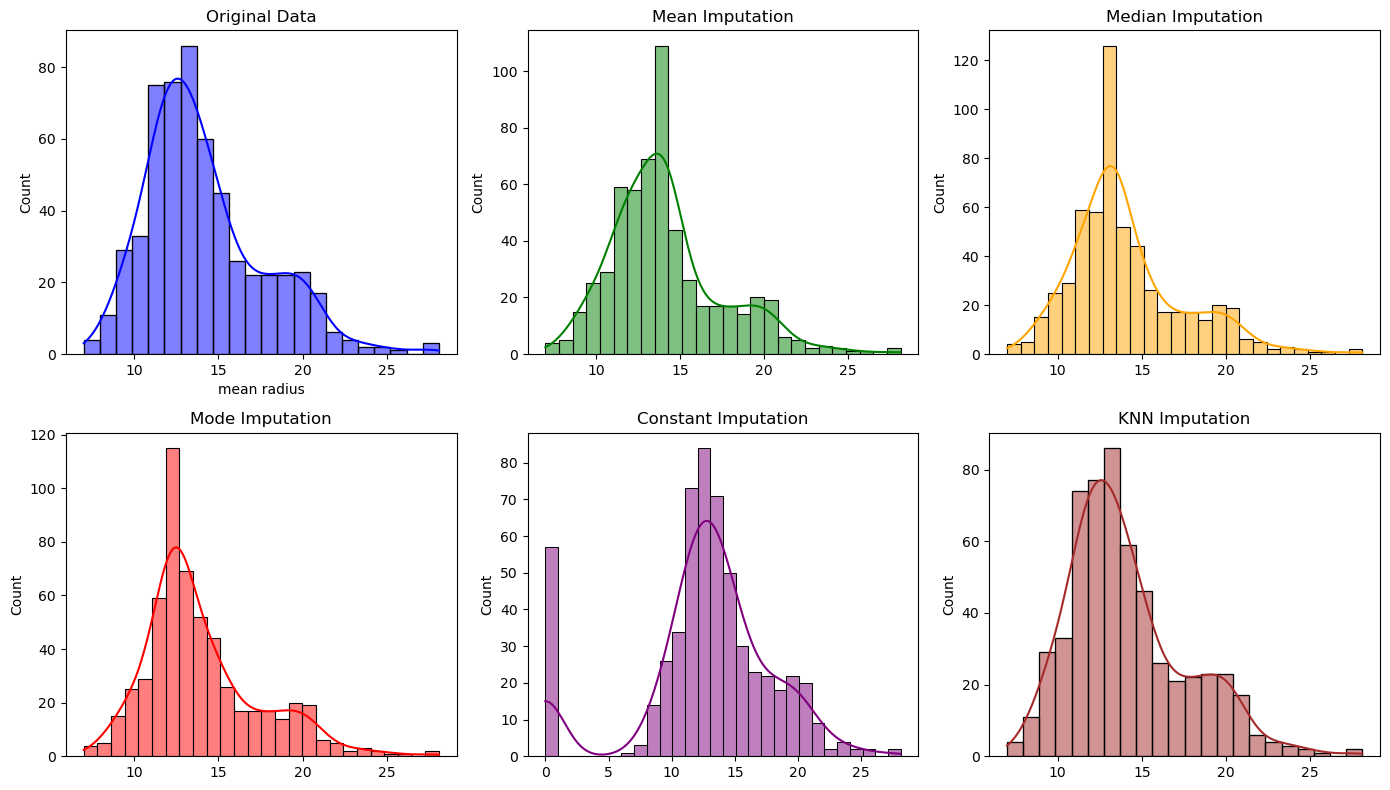

In [11]:
plt.figure(figsize=(14, 8))
plt.subplot(231)
sns.histplot(df['mean radius'], kde=True, color='blue')
plt.title("Original Data")

plt.subplot(232)
sns.histplot(df_mean_imputed[:, 0], kde=True, color='green')
plt.title("Mean Imputation")

plt.subplot(233)
sns.histplot(df_median_imputed[:, 0], kde=True, color='orange')
plt.title("Median Imputation")

plt.subplot(234)
sns.histplot(df_mode_imputed[:, 0], kde=True, color='red')
plt.title("Mode Imputation")

plt.subplot(235)
sns.histplot(df_constant_imputed[:, 0], kde=True, color='purple')
plt.title("Constant Imputation")

plt.subplot(236)
sns.histplot(df_knn_imputed[:, 0], kde=True, color='brown')
plt.title("KNN Imputation")

plt.tight_layout()
plt.show()

#### Original Data: 
This plot shows the distribution of the 'mean radius' feature in the original dataset. It appears to be a unimodal distribution with a peak around 14.
#### Mean Imputation: 
After imputing missing values with the mean, the distribution becomes slightly more symmetric and centered around the mean value.
#### Median Imputation: 
Median imputation preserves the overall shape of the distribution but shifts the peak slightly to the left compared to the original data.
#### Mode Imputation: 
Mode imputation results in a bimodal distribution, with one peak at the mode value and another peak at the original data distribution.
#### Constant Imputation: 
Constant imputation (filling missing values with 0) creates a distribution with a peak at 0 and a long tail towards higher values.

# 2. Scaling and Normalization
Different machine learning models have varying requirements regarding feature scaling. Scaling ensures that all features contribute equally to the model’s training process.

## a) StandardScaler
Standardizes features by removing the mean and scaling to unit variance. It ensures that each feature has a mean of zero and a standard deviation of one. This is particularly important for models like SVM and logistic regression, where the model assumes that all features are centered around zero.
## b) MinMaxScaler
Transforms features by scaling them to a given range, typically [0, 1]. It’s useful when you need to preserve the shape of the distribution of the data while shifting and scaling it.
## c) MaxAbsScaler
Scales each feature by its maximum absolute value, preserving the sparsity of the data. This is useful when working with data that contains a large number of zero entries.
## d) RobustScaler
Scales features using statistics that are robust to outliers. It removes the median and scales according to the interquartile range (IQR). This scaler is beneficial when your data contains outliers, as it is less sensitive to them than the StandardScaler.

In [12]:
# Using MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['target']))
df_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Visualizing the effect of scaling


C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


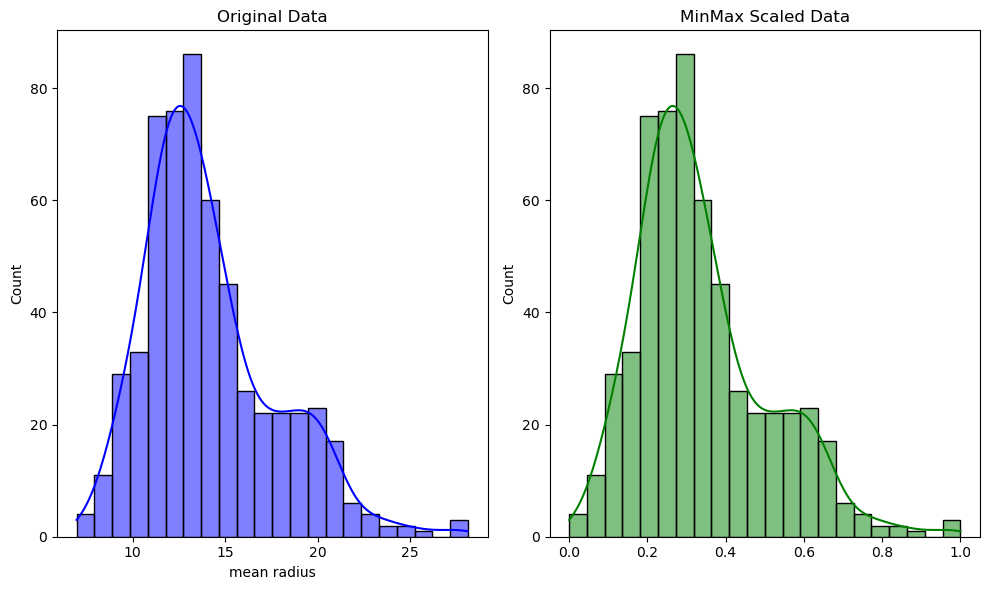

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.histplot(df['mean radius'], kde=True, color='blue')
plt.title("Original Data")

plt.subplot(122)
sns.histplot(df_scaled[:, 0], kde=True, color='green')
plt.title("MinMax Scaled Data")

plt.tight_layout()
plt.show()

#### Original Data: 
This plot shows the distribution of the 'mean radius' feature in the original dataset, which has a wide range of values.
#### MinMax Scaled Data: 
After applying MinMax scaling, the distribution is compressed into the range [0, 1], making all values non-negative. The shape of the distribution remains similar to the original data.

# 3. Encoding Categorical Variables
Machine learning models cannot directly handle categorical variables, so they need to be converted into numerical representations.
## a) OneHotEncoder
Converts categorical variables into a series of binary columns (one-hot encoding). Each category is represented as a separate column with a binary value (0 or 1). This method is widely used when the categorical variable does not have an intrinsic order.
## b) LabelEncoder
Encodes categorical variables as integers. Each category is assigned a unique integer. This method is often used when there is a natural order in the categories (ordinal data). However, it may introduce unintended ordinal relationships where they don’t exist.
## c) OrdinalEncoder
Similar to LabelEncoder, but it is specifically designed for encoding ordinal categorical features, where the categories have a meaningful order.
## d) Target Encoding
Encodes categorical variables by replacing each category with the mean of the target variable for that category. It’s useful when there are a high number of categories, and OneHotEncoding would result in too many features.

In [14]:
# We use categorical data, so using the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# Used OneHotEncoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_species = encoder.fit_transform(iris_df[['species']])

print("\nOneHotEncoded Species Feature:\n", encoded_species[:5])


OneHotEncoded Species Feature:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# 4. Feature Generation and Selection
Creating new features or selecting the most relevant ones can significantly improve model performance.

## a) Polynomial Features
Generates new features by taking polynomial combinations of the existing features. It’s particularly useful for linear models to capture non-linear relationships.
## b) Interaction Features
Creates features that are the product of two or more existing features. This can help the model capture interactions between variables.

In [17]:
# Used Polynomial Features in this case
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df_scaled)

print(f"\nPolynomial Features shape: {df_poly.shape}")


Polynomial Features shape: (569, 495)


## c) Feature Selection Methods
### 1. Variance Threshold: 
Removes features that do not meet a certain variance threshold, which is a simple way to eliminate non-informative features.
### 2. SelectKBest: 
Selects the top k features based on a univariate statistical test (e.g., chi-square, ANOVA F-value).
### 3. Recursive Feature Elimination (RFE): 
Recursively removes the least important features and builds the model until the specified number of features is reached.
### 4. L1 Regularization (Lasso): 
Encourages sparsity in the feature space, effectively selecting features by assigning zero coefficients to less important ones.

In [18]:
# Feature Selection using SelectKBest
# Now this should work as df_scaled contains only non-negative values
selector = SelectKBest(chi2, k=10)
df_selected = selector.fit_transform(df_scaled, df['target'])

print(f"\nSelected Top K Features shape: {df_selected.shape}")


Selected Top K Features shape: (569, 10)


# 5. Dimensionality Reduction
Reducing the number of features can simplify the model, reduce overfitting, and speed up computation.

## a) Principal Component Analysis (PCA)
A technique to reduce the dimensionality of the dataset by transforming the original features into a new set of orthogonal features (principal components) that explain the most variance in the data. PCA is widely used for data visualization and to improve model efficiency.
## b) Linear Discriminant Analysis (LDA)
Similar to PCA but supervised, LDA finds the linear combinations of features that best separate the classes. It’s often used for classification tasks.
## c) t-SNE (t-distributed Stochastic Neighbor Embedding)
A non-linear dimensionality reduction technique primarily used for data visualization. It maps high-dimensional data into a lower-dimensional space, preserving the local structure of the data.
## d) UMAP (Uniform Manifold Approximation and Projection)
Another non-linear dimensionality reduction technique that preserves more of the global structure of the data compared to t-SNE. It’s becoming popular for both visualization and preprocessing.

In [19]:
# Used PCA in this case
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115],
       ...,
       [ 0.22631131, -0.28794577],
       [ 1.67783369,  0.33594595],
       [-0.90506804, -0.10410875]])

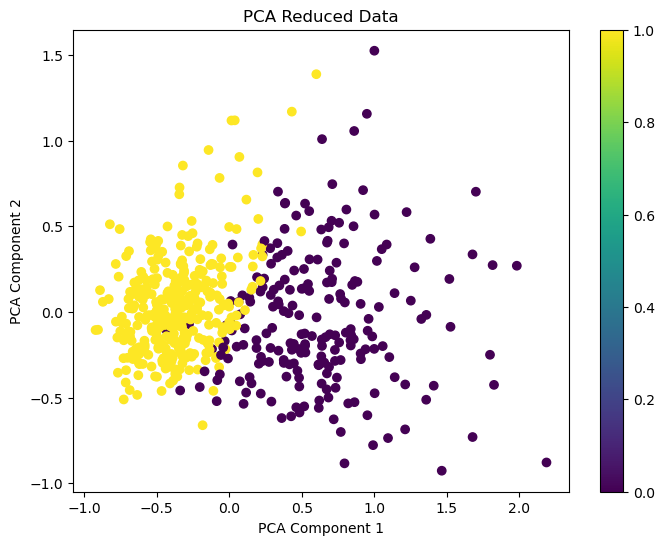

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['target'], cmap='viridis')
plt.title("PCA Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

This plot shows the first two principal components of the scaled dataset. Each point represents an observation, and the color indicates the target class (0 or 1). The plot suggests that the first two principal components are able to separate the two classes to some extent, but there is still some overlap between them.

# 6. Data Splitting
Before applying machine learning models, it’s essential to split the data into training and testing sets.

## a) Train-Test Split
Divides the dataset into a training set (used to train the model) and a test set (used to evaluate model performance). A common split is 80/20 or 70/30.
## b) Cross-Validation
A more robust method where the dataset is divided into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold, and this process is repeated k times. Cross-validation provides a more reliable estimate of model performance.

In [21]:
# Used Train-Test Split in this case
X_train, X_test, y_train, y_test = train_test_split(df_selected, df['target'], test_size=0.3, random_state=42)

# 7. Pipeline Creation
Scikit-learn allows you to chain preprocessing steps and model training into a single pipeline. This ensures that the same transformations are applied consistently and allows for easier tuning of hyperparameters.

## a) Pipeline
A sequence of data transformations followed by a model. For example, you could have a pipeline with an imputer, scaler, and a logistic regression model.
## b) ColumnTransformer
Allows you to apply different preprocessing steps to different subsets of the features in your dataset. For instance, you could scale numerical features while one-hot encoding categorical features in a single pipeline.

In [22]:
# Logistic Regression Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', LogisticRegression(max_iter=1000))])


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Confusion Matrix:



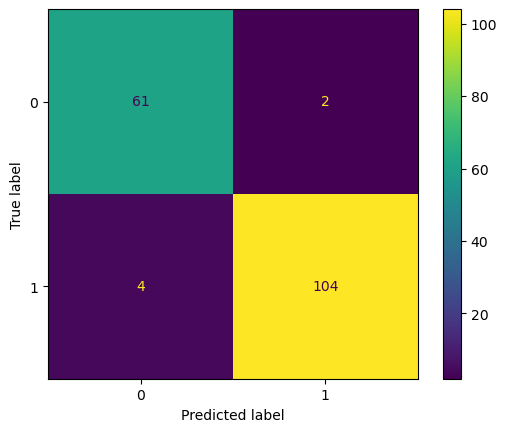

In [23]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n",)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 9. Model Optimization
Once the data is preprocessed and a model is selected, optimizing the model’s performance through hyperparameter tuning is crucial.

## a) Grid Search
Exhaustively searches through a specified parameter grid to find the optimal hyperparameters for the model. Grid Search is computationally expensive but thorough.
## b) Random Search
Randomly samples from the parameter grid to find good hyperparameters. While less exhaustive than Grid Search, it’s faster and often finds nearly optimal parameters.
## c) Bayesian Optimization
An advanced method that builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters. It is more efficient than Grid Search and Random Search.

In [24]:
# Model Optimization using Grid Search in this case
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}
param_grid

{'classifier__C': [0.1, 1, 10, 100],
 'classifier__solver': ['liblinear', 'saga']}

In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Parameters:", grid_search.best_params_)

C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best Model Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}


C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Optimized Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix:



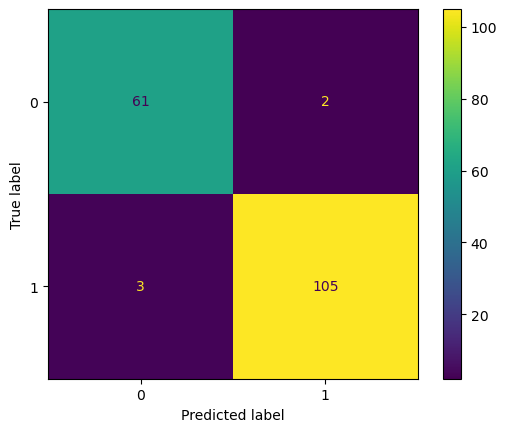

In [26]:
print("\nOptimized Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n")
cm2 = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

## 9. Random Forest Model Pipeline


In [27]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:



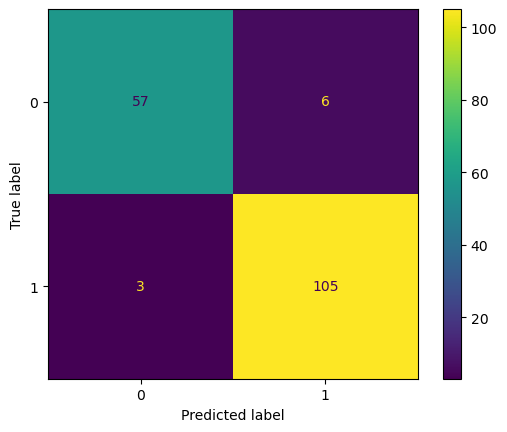

In [29]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n")
cm3 = confusion_matrix(y_test, y_pred_rf)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

## 10. Visualization of Model Comparison


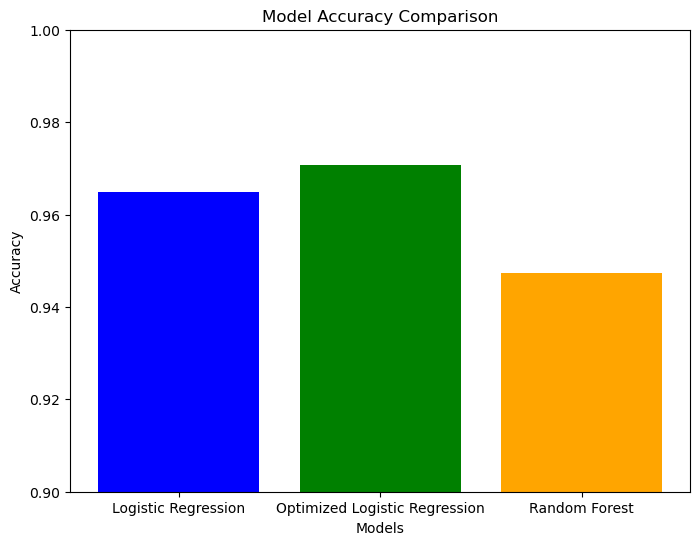

In [30]:
plt.figure(figsize=(8, 6))
plt.bar(['Logistic Regression', 'Optimized Logistic Regression', 'Random Forest'], 
        [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_best), accuracy_score(y_test, y_pred_rf)],
        color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show()

The optimized logistic regression model achieves the highest accuracy, followed by the Random Forest model and the original logistic regression model. All three models have an accuracy above 0.95, indicating strong performance on the test set.